 Experiment no 1

Loading data...
17464789/17464789 [==============================] - 74s 4us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5731 - accuracy: 0.6949 - val_loss: 0.4818 - val_accuracy: 0.7768
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4368 - accuracy: 0.8031 - val_loss: 0.4907 - val_accuracy: 0.7779
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5163 - accuracy: 0.7412 - val_loss: 0.6196 - val_accuracy: 0.6577
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4664 - accuracy: 0.7804 - val_loss: 0.6243 - val_accuracy: 0.7354
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4161 - accuracy: 0.8112 - val_loss: 0.5682 - val_accuracy: 0.7469
Epoch 1/5
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4162 - accuracy: 0.8114 - val_loss: 0.34

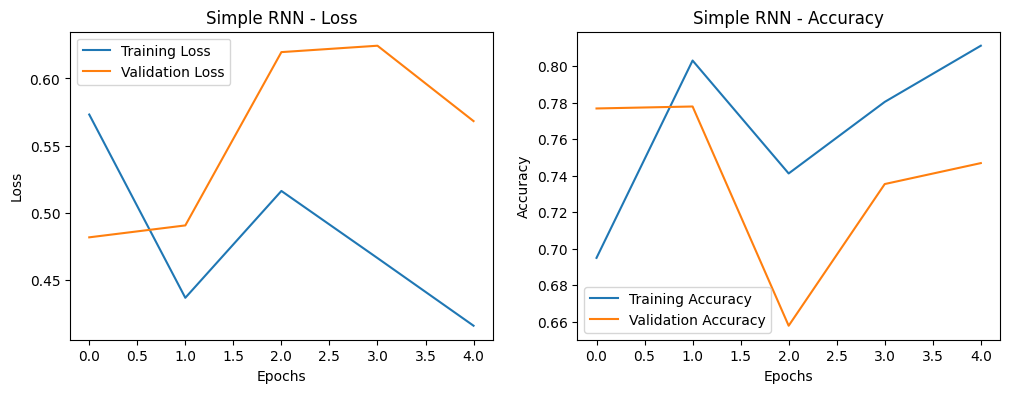

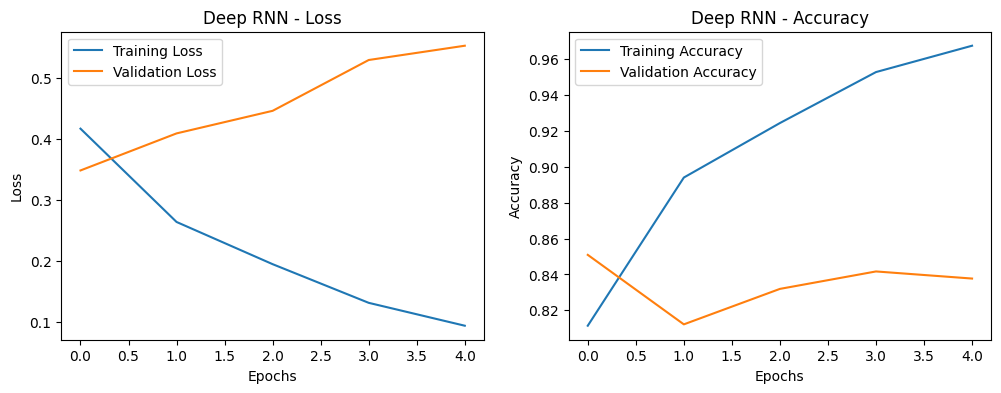

Sample Review: 'This movie was fantastic and really captivating.'
1/1 [==============================] - 0s 90ms/step
Simple RNN Prediction: Positive
1/1 [==============================] - 0s 253ms/step
Deep RNN Prediction: Positive


In [1]:

from keras.optimizers.legacy import Adam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load the IMDb dataset
max_features = 10000
maxlen = 100
batch_size = 16

# ----------------
print('hello')

print("Loading data...")
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_features)
print(len(train_x), "train sequences")
print(len(test_x), "test sequences")

# Pad sequences to a fixed length
print("Pad sequences (samples x time)")
train_x = sequence.pad_sequences(train_x, maxlen=maxlen)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen)

# Create a Simple RNN model
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(max_features, 128))
simple_rnn_model.add(SimpleRNN(64))
simple_rnn_model.add(Dense(1, activation='sigmoid'))

simple_rnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Create a Deep RNN model with LSTM layers
deep_rnn_model = Sequential()
deep_rnn_model.add(Embedding(max_features, 128))
deep_rnn_model.add(LSTM(64, return_sequences=True))
deep_rnn_model.add(LSTM(64))
deep_rnn_model.add(Dense(1, activation='sigmoid'))

deep_rnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the Simple RNN model
simple_rnn_history = simple_rnn_model.fit(train_x, train_y, batch_size=batch_size, epochs=5, validation_data=(test_x, test_y))

# Train the Deep RNN model
deep_rnn_history = deep_rnn_model.fit(train_x, train_y, batch_size=batch_size, epochs=5, validation_data=(test_x, test_y))

# Plot training curves
def plot_training_curves(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    plt.show()

plot_training_curves(simple_rnn_history, 'Simple RNN')
plot_training_curves(deep_rnn_history, 'Deep RNN')

# Inference and prediction
def predict_sentiment(model, text):
    word_index = imdb.get_word_index()
    text = text.lower().split()
    text = [word_index[word] if word in word_index and word_index[word] < max_features else 2 for word in text]
    text = sequence.pad_sequences([text], maxlen=maxlen)
    prediction = model.predict(text)
    return 'Positive' if prediction > 0.5 else 'Negative'

sample_review = "This movie was fantastic and really captivating."
print(f"Sample Review: '{sample_review}'")
print(f"Simple RNN Prediction: {predict_sentiment(simple_rnn_model, sample_review)}")
print(f"Deep RNN Prediction: {predict_sentiment(deep_rnn_model, sample_review)}")

experiment no 3

In [3]:

import pandas as pd
import numpy as np

data=pd.read_csv('/Users/amanpathan/Downloads/Data.csv')
data.head(5)
     

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
print(data.isnull().sum())

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


In [5]:
df=data.dropna()  #deletes rows with null value
print(df.isnull().sum())

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


In [6]:
df=data.dropna(axis=1) # deletes columns with null values
print(df.isnull().sum())

Country      0
Purchased    0
dtype: int64


In [7]:
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, np.nan, 10]
})
print(data)

     A     B
0  1.0   6.0
1  2.0   NaN
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [8]:
imputed_data=data.fillna(data.mean())
print(imputed_data)

     A     B
0  1.0   6.0
1  2.0   8.0
2  3.0   8.0
3  4.0   8.0
4  5.0  10.0


In [9]:
imputed_data=data.fillna(0)
print(imputed_data)

     A     B
0  1.0   6.0
1  2.0   0.0
2  0.0   8.0
3  4.0   0.0
4  5.0  10.0


In [10]:
data_ffill = data.fillna(method='ffill')
print(data_ffill)

     A     B
0  1.0   6.0
1  2.0   6.0
2  2.0   8.0
3  4.0   8.0
4  5.0  10.0


/var/folders/g1/5bfqplxx0ydgr3j80vvhgty40000gn/T/ipykernel_2539/3246918041.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill = data.fillna(method='ffill')


In [11]:
data_bfill = data.fillna(method='bfill')
print(data_bfill)

     A     B
0  1.0   6.0
1  2.0   8.0
2  4.0   8.0
3  4.0  10.0
4  5.0  10.0


/var/folders/g1/5bfqplxx0ydgr3j80vvhgty40000gn/T/ipykernel_2539/665377745.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bfill = data.fillna(method='bfill')


In [12]:
data_interpolated = data.interpolate(method='linear')
print(data_interpolated)
     

     A     B
0  1.0   6.0
1  2.0   7.0
2  3.0   8.0
3  4.0   9.0
4  5.0  10.0


In [13]:
numpy_tensor=data_interpolated.to_numpy()
print(numpy_tensor)

[[ 1.  6.]
 [ 2.  7.]
 [ 3.  8.]
 [ 4.  9.]
 [ 5. 10.]]


In [15]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 2.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.5 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.8 MB/s eta 0:00:0000:0100:01


In [16]:
import torch

# Convert DataFrame to PyTorch tensor
torch_tensor = torch.tensor(data_interpolated.values)
print(torch_tensor)

tensor([[ 1.,  6.],
        [ 2.,  7.],
        [ 3.,  8.],
        [ 4.,  9.],
        [ 5., 10.]], dtype=torch.float64)


In [17]:

import tensorflow as tf

# Convert DataFrame to TensorFlow tensor
tf_tensor = tf.constant(data_interpolated.values)
print(tf_tensor)

tf.Tensor(
[[ 1.  6.]
 [ 2.  7.]
 [ 3.  8.]
 [ 4.  9.]
 [ 5. 10.]], shape=(5, 2), dtype=float64)


experiment 4

In [18]:
#4
import numpy as np

# Create tensors (multi-dimensional arrays) using NumPy
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print('tensor_a\n',a)
print('tensor_b\n',b)
     

tensor_a
 [[1 2]
 [3 4]]
tensor_b
 [[5 6]
 [7 8]]


In [19]:
tensor_sum = a + b
print("Sum of tensors:\n",tensor_sum)

# Scalar multiplication
scalar = 2
tensor_scaled = scalar * a
print("\nScalar multiplication:\n",tensor_scaled)

# Element-wise multiplication
tensor_product = np.multiply(a,b) #a*b
print("\nElement-wise multiplication:\n",tensor_product)

#matrix multiplication
dot_product=a@b # equivalent to np.dot(a,b)
print("\nMatrix multiplication:\n",dot_product)

Sum of tensors:
 [[ 6  8]
 [10 12]]

Scalar multiplication:
 [[2 4]
 [6 8]]

Element-wise multiplication:
 [[ 5 12]
 [21 32]]

Matrix multiplication:
 [[19 22]
 [43 50]]


In [20]:

import tensorflow as tf

# Create tensors using TensorFlow
tensor_a = tf.constant([[1, 2], [3, 4]])
tensor_b = tf.constant([[5, 6], [7, 8]])

# Addition
tensor_sum = tf.math.add(tensor_a, tensor_b)
print("Sum of tensors:\n",tensor_sum)

# Scalar multiplication
scalar = 2
tensor_scaled = tf.math.scalar_mul(scalar, tensor_a)
print("Scalar multiplication:\n",tensor_scaled)

# Element-wise multiplication
tensor_product = tf.math.multiply(tensor_a, tensor_b)
print("\nElement-wise multiplication:\n",tensor_product)

#dot product
dot_product = tf.linalg.matmul(tensor_a, tensor_b)
print("\nDot Product:\n",dot_product)

Sum of tensors:
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
Scalar multiplication:
 tf.Tensor(
[[2 4]
 [6 8]], shape=(2, 2), dtype=int32)

Element-wise multiplication:
 tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)

Dot Product:
 tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


experiment 5

In [21]:
#5
# Implementation of AND gate using M-P Neuron
import tensorflow as tf

def mcCullochPittsNeuron(input_data,weights,threshold):
  weighted_sum=tf.reduce_sum(input_data*weights,axis=1)
  output=tf.where(weighted_sum>=threshold,1,0)
  return output

# Define the input data (truth table for AND gate)
input_data = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]])

# Define the weights
weights = tf.constant([1, 1])

output=mcCullochPittsNeuron(input_data,weights,2)
print("Input Data:\n",input_data.numpy())
print("AND Gate Output:\n",output.numpy())

Input Data:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
AND Gate Output:
 [0 0 0 1]


experiment 6

In [22]:
# 6. forward pass with multpication matrix
import numpy as np

def activation(z):
  return 1/(1+np.exp(-z))

def loss_function(target,output):                #Mean Squared Error
  return (1/len(target))*np.square(target-output)

def forwardpass(x,weights,bias):
  weighted_sum=np.dot(x,weights)+bias
  print("Weighted Sum :\n",weighted_sum)
  output=activation(weighted_sum)
  return output

#input data
x=np.array([[0.5, 0.3], [0.2, 0.7], [0.8, 0.9]])

#weights
weights=np.array([[0.8], [0.2]])

#targets
targets=np.array([[1], [0], [1]])

#bias
bias=np.array([0.1])

print("Input Data :\n",x)

output=forwardpass(x,weights,bias)
loss=loss_function(targets,output)

print("Output :\n",output)
print("Loss :\n",loss)


Input Data :
 [[0.5 0.3]
 [0.2 0.7]
 [0.8 0.9]]
Weighted Sum :
 [[0.56]
 [0.4 ]
 [0.92]]
Output :
 [[0.63645254]
 [0.59868766]
 [0.71504211]]
Loss :
 [[0.04405559]
 [0.11947564]
 [0.027067  ]]


In [28]:
#forward pass with hidden layer
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def forward_pass(x, epochs=100):
    model = Sequential()
    model.add(Dense(units=1, activation='sigmoid', input_dim=2))  # Input to output
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x, x, epochs=epochs)
    output = model.predict(x)
    return output

# Input data
x = np.array([[0.5, 0.3], [0.2, 0.7], [0.8, 0.9]])

# Output data
output = forward_pass(x, epochs=100)

print("\nInput Data :\n", x)
print("\nOutput Data :\n", output)


Epoch 1/100
1/1 [==============================] - 0s 82ms/step - loss: 0.1328
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1326
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1324
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1317
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1315
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1312
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1310
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1308
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1305
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1303
Epoch 13/100
1/1 [==============================] - 0s 3ms/s

experiment 7

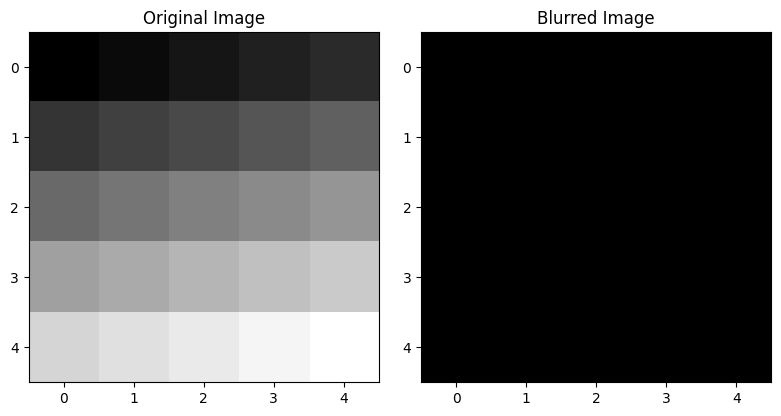

In [29]:
#7
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sample grayscale image
image = np.array([[10, 20, 30, 40, 50],
                  [60, 70, 80, 90, 100],
                  [110, 120, 130, 140, 150],
                  [160, 170, 180, 190, 200],
                  [210, 220, 230, 240, 250]], dtype=np.uint8)

# blur filter
blur_filter = np.array([[1, 1, 1], 
                   [1, 1, 1],
                   [1, 1, 1]])

blurred_image = cv2.filter2D(image, -1, blur_filter)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')

plt.tight_layout()
plt.show()

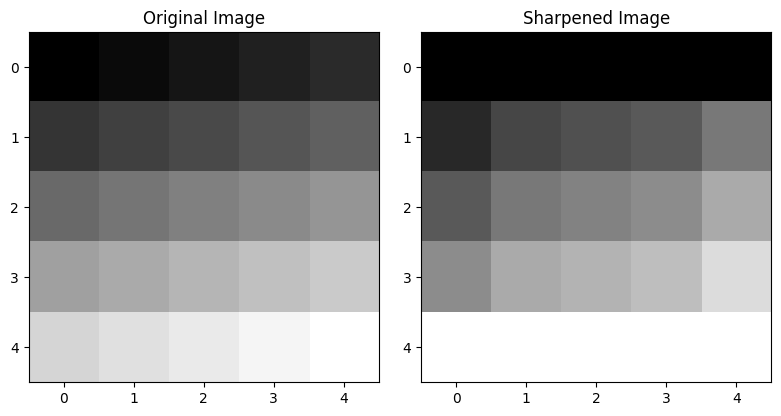

In [30]:
# Sharpening Filter
sharpening_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpening_filter)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()

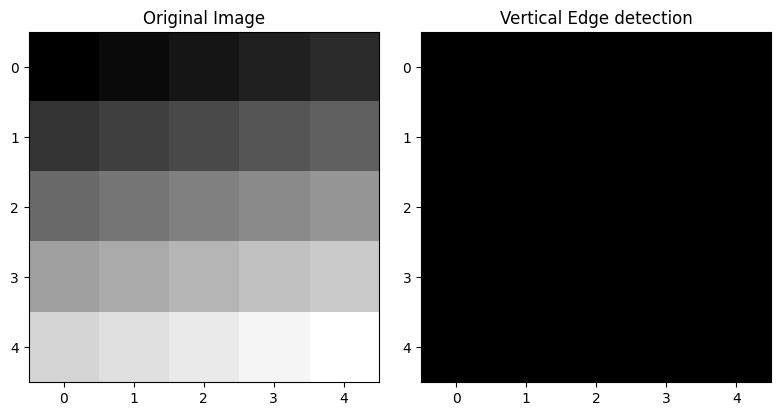

In [31]:
# Vertical Edge Detection
kernel= np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Vertical Edge detection')

plt.tight_layout()
plt.show()

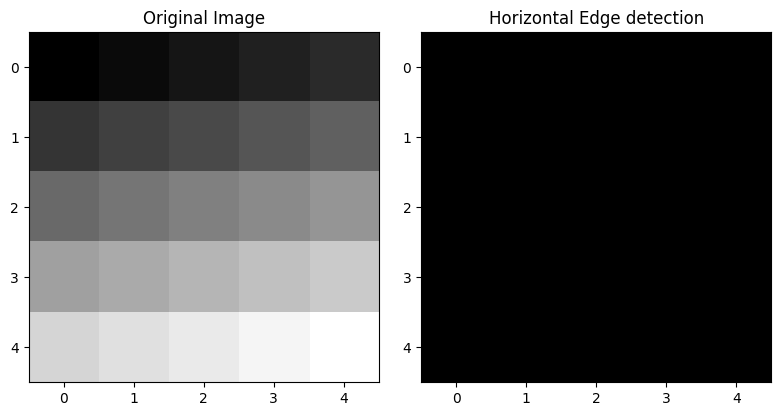

In [32]:
# Horizontal Edge Detection
kernel= np.array([[1,2,1],
                  [2,2,0],
                  [0,1,2]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Horizontal Edge detection')

plt.tight_layout()
plt.show()

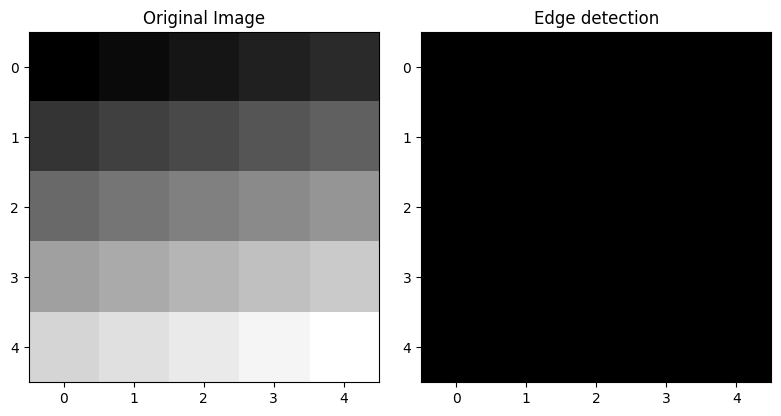

In [33]:
# Edge detecction 

kernel= np.array([[1,1,1],
                  [1,8,1],
                  [1,1,1]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Edge detection')

plt.tight_layout()
plt.show()

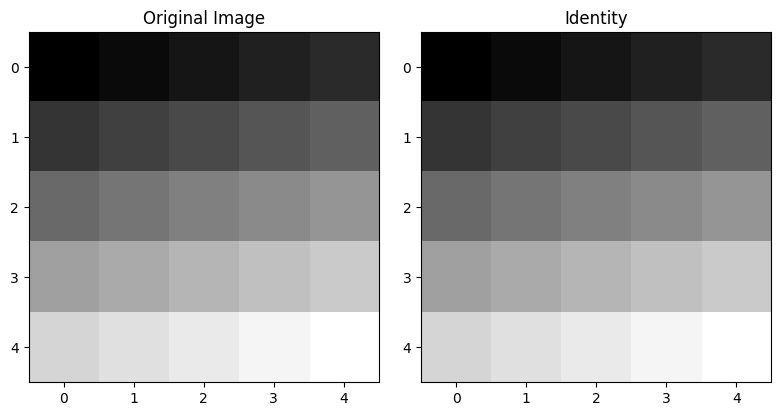

In [34]:
# Identity

# Vertical Edge Detection

kernel= np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Identity')

plt.tight_layout()
plt.show()


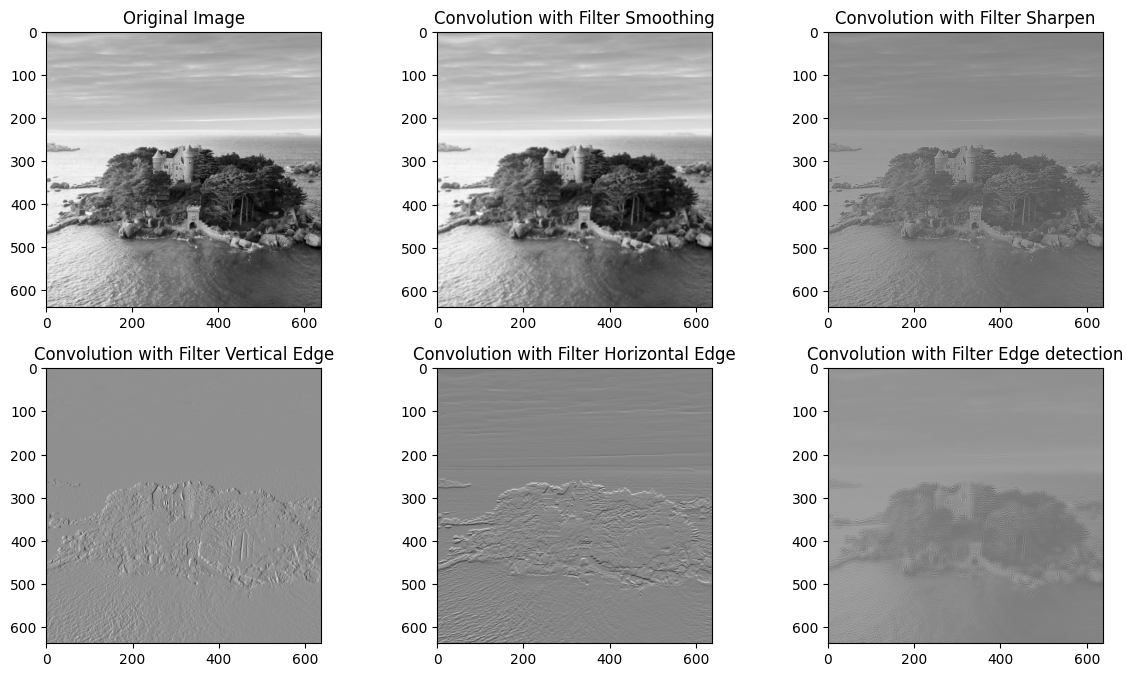

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Load the image using cv2.imread
image_path = "/Users/amanpathan/Downloads/test7.jpg"  # Replace with the actual image path
image_cv2 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Check if the image is loaded successfully
if image_cv2 is None:
    print("Error: Unable to load the image.")
    exit()

# Resize the image to 640x640
image_resized = cv2.resize(image_cv2, (640, 640))

# Reshape the image to match the expected input shape for convolution
image = image_resized.reshape(1, 640, 640, 1)

blur_filter = np.array([[1, 1, 1], 
                       [1, 1, 1],
                       [1, 1, 1]], dtype=np.float32)

sharpening_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]], dtype=np.float32)

vertical_edge_filter = np.array([[1, 0, -1],
                                [2, 0, -2],
                                [1, 0, -1]], dtype=np.float32)

horizontal_edge_filter = np.array([[1, 2, 1],
                                  [0, 0, 0],
                                  [-1, -2, -1]], dtype=np.float32)

edge_detection_filter = np.array([[1, 1, 1],
                                 [1, -7, 1],
                                 [1, 1, 1]], dtype=np.float32)


# Create TensorFlow constants for the image and the filters
image_tensor = tf.constant(image,dtype=np.float32)

filters_list = [blur_filter, sharpening_filter, vertical_edge_filter, horizontal_edge_filter, edge_detection_filter]
filters=['Smoothing','Sharpen','Vertical Edge','Horizontal Edge','Edge detection']
# Perform convolution with each filter and display the results
plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')

for i, filter in enumerate(filters_list):
    filter_tensor = tf.constant(filter.reshape(3, 3, 1, 1), dtype=tf.float32)
    convolution = tf.nn.conv2d(image_tensor, filter_tensor, strides=1, padding='VALID')
    plt.subplot(3, 3, i + 2)
    plt.imshow(convolution.numpy().squeeze(), cmap='gray')
    plt.title(f'Convolution with Filter {filters[i]}')

plt.tight_layout()
plt.show()

In [9]:
from keras.optimizers.legacy import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
# Define a FCNN with one neuron
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1, activation='softmax')
])

# Define a FCNN with one hidden layer
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
# Compile the models
model1.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
print(set(train_labels))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [15]:
# Train the models
history1 = model1.fit(train_images.reshape((-1, 28, 28, 1)), train_labels, epochs=5, validation_data=(test_images.reshape((-1, 28, 28, 1)), test_labels))


Epoch 1/5


2023-11-02 23:36:43.573143: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 9 which is outside the valid range of [0, 1).  Label values: 1 9 1 1 6 1 6 1 7 5 5 8 8 4 9 7 4 0 8 8 4 8 1 2 6 3 1 9 6 4 5 1


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/amanpathan/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/amanpathan/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/amanpathan/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/g1/5bfqplxx0ydgr3j80vvhgty40000gn/T/ipykernel_4041/2776481868.py", line 2, in <module>

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1127, in train_step

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1185, in compute_loss

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Users/amanpathan/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5777, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 1).  Label values: 1 9 1 1 6 1 6 1 7 5 5 8 8 4 9 7 4 0 8 8 4 8 1 2 6 3 1 9 6 4 5 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_46518]

In [13]:
history2 = model2.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 1s 672us/step - loss: 0.2611 - accuracy: 0.9257 - val_loss: 0.1333 - val_accuracy: 0.9609
Epoch 2/5
1875/1875 [==============================] - 1s 621us/step - loss: 0.1125 - accuracy: 0.9660 - val_loss: 0.1003 - val_accuracy: 0.9691
Epoch 3/5
1875/1875 [==============================] - 1s 619us/step - loss: 0.0770 - accuracy: 0.9767 - val_loss: 0.0824 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 1s 656us/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0770 - val_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 1s 688us/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0782 - val_accuracy: 0.9755


NameError: name 'history1' is not defined

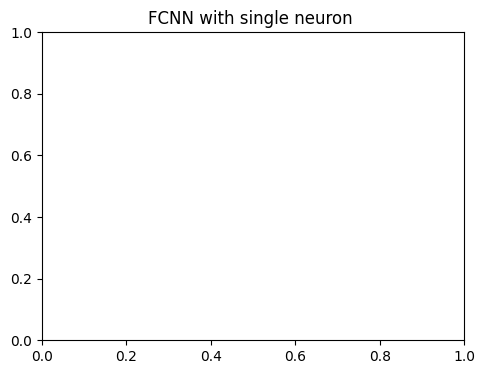

In [14]:
# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('FCNN with single neuron ')
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('FCNN with one Hidden Layer')
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


8 A Simple CNN for Image Classification

In [17]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalize pixel values to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [19]:
# Train the model
history=model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1457 - accuracy: 0.9558 - val_loss: 0.0481 - val_accuracy: 0.9853
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0452 - accuracy: 0.9854 - val_loss: 0.0351 - val_accuracy: 0.9877
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0391 - val_accuracy: 0.9860
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0274 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0254 - val_accuracy: 0.9920


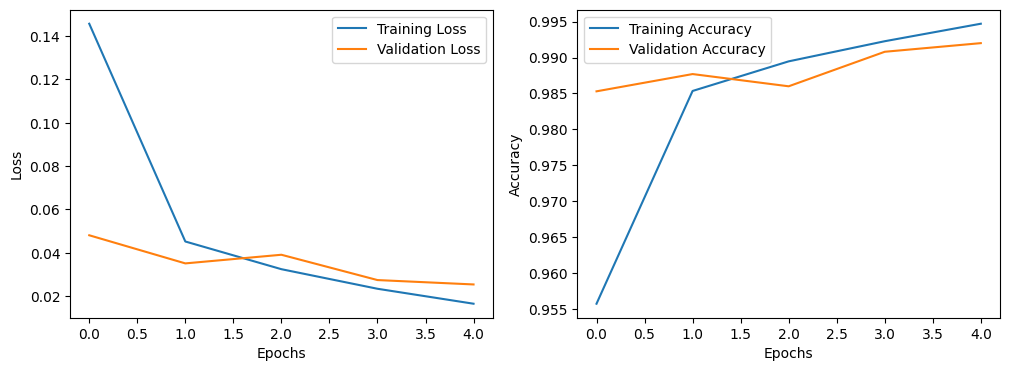

In [20]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

9 MNIST Digit Classification with Data Shuffling

In [21]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [22]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Shuffle the training data
shuffled_indices = np.random.permutation(len(train_images))
train_images, train_labels = train_images[shuffled_indices], train_labels[shuffled_indices]

In [23]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 64)               

In [24]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1459 - accuracy: 0.9546 - val_loss: 0.0554 - val_accuracy: 0.9829
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0328 - val_accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0305 - val_accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0329 - val_accuracy: 0.9898


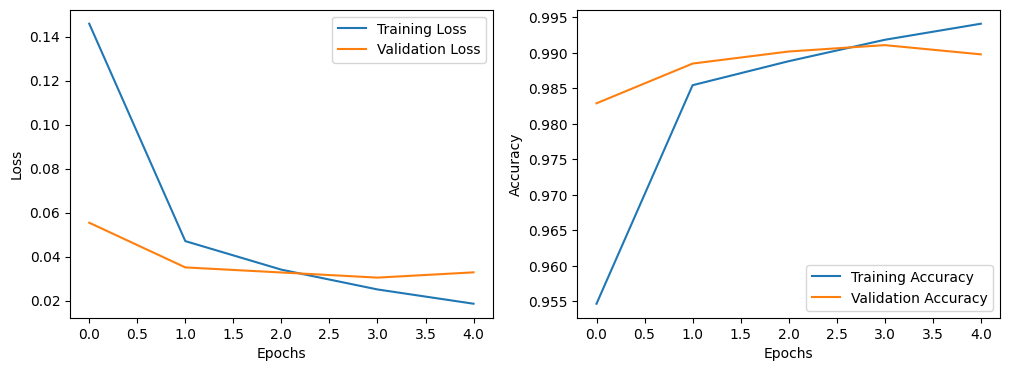

In [25]:
# Generate and display training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


10 Cifar-10 Classification with and without Normalization

170498071/170498071 [==============================] - 188s 1us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 2304)              0         
                                                   

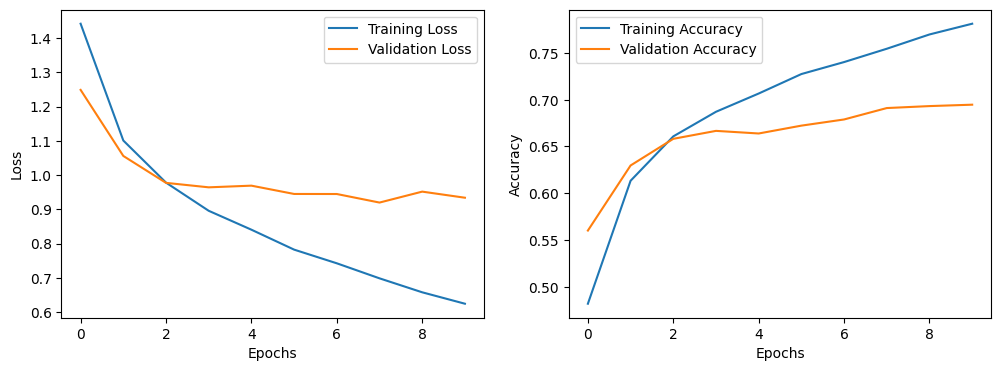

313/313 [==============================] - 1s 4ms/step


In [26]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to a range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model_with_norm = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_with_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model_with_norm.summary()

# Train the model
history_with_norm = model_with_norm.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_with_norm.history['loss'], label='Training Loss')
plt.plot(history_with_norm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_with_norm.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_norm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Predict using the trained model
predictions = model_with_norm.predict(test_images)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_15 (Dense)            (None, 64)               

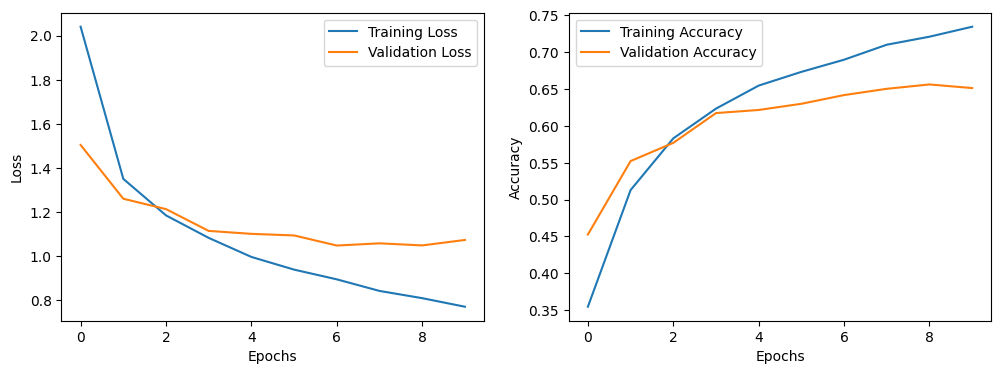

313/313 [==============================] - 1s 4ms/step


In [27]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Define the CNN model
model_without_norm = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_without_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model_without_norm.summary()

# Train the model
history_without_norm = model_without_norm.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_without_norm.history['loss'], label='Training Loss')
plt.plot(history_without_norm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_without_norm.history['accuracy'], label='Training Accuracy')
plt.plot(history_without_norm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Predict using the trained model
predictions = model_without_norm.predict(test_images)

11 Using a Pre-trained ImageNet Network

In [30]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load a pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Define your custom image preprocessing function (for your specific dataset)
def preprocess_custom_image(image_path):
    # Load and preprocess your custom image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess a custom image for classification
custom_image_path = '/Users/amanpathan/Downloads/flower11.jpg'  # Replace with your image path
custom_image = preprocess_custom_image(custom_image_path)

# Make predictions using the pre-trained model
predictions = model.predict(custom_image)

# Decode the predictions to human-readable labels
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the top predicted labels and their associated probabilities
for label, description, probability in decoded_predictions:
    print(f"{label}: {description} ({probability:.2f})")

35363/35363 [==============================] - 0s 1us/step
n11939491: daisy (0.96)
n02280649: cabbage_butterfly (0.01)
n02281406: sulphur_butterfly (0.01)
n02206856: bee (0.01)
n13044778: earthstar (0.00)


12 
Implementation of Simple RNN and Deep RNN

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5660 - accuracy: 0.6949 - val_loss: 0.5845 - val_accuracy: 0.6782
Epoch 2/5
1563/1563 [==============================] - 23s 14ms/step - loss: 0.4439 - accuracy: 0.7989 - val_loss: 0.4765 - val_accuracy: 0.7975
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4254 - accuracy: 0.8020 - val_loss: 0.7059 - val_accuracy: 0.5997
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4651 - accuracy: 0.7772 - val_loss: 0.6943 - val_accuracy: 0.6108
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4125 - accuracy: 0.8117 - val_loss: 0.5934 - val_accuracy: 0.7249
Epoch 1/5
1563/1563 [==============================] - 89s 57ms/step - loss: 0.4480 - accuracy: 0.7919 - val_loss: 0.3966 - val_accuracy: 0.8268
Epoch 2/5
1563/1563 [===================

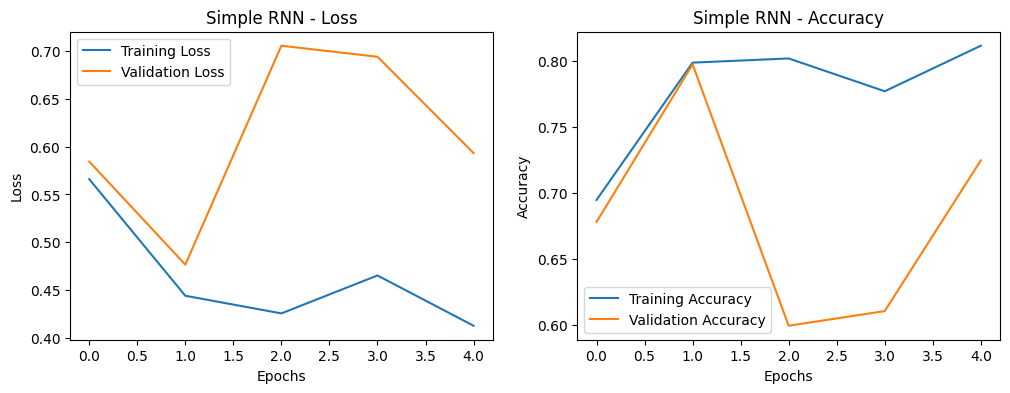

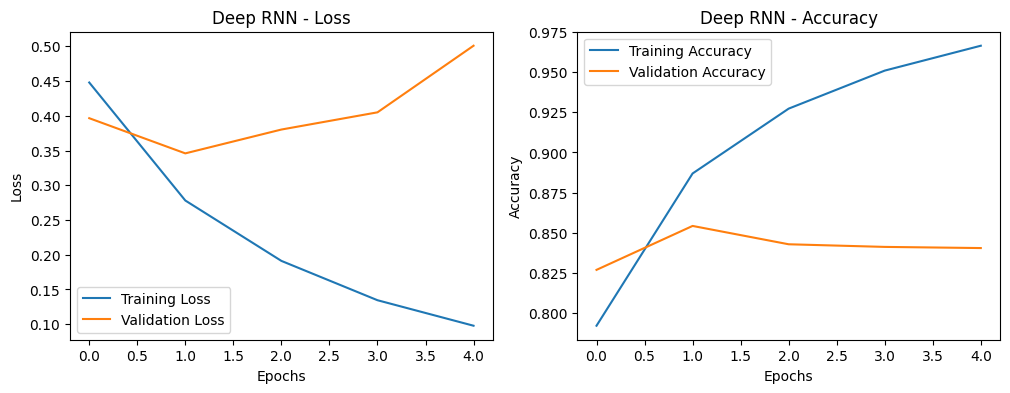

Sample Review: 'This movie was fantastic and really captivating.'
1/1 [==============================] - 0s 59ms/step
Simple RNN Prediction: Negative
1/1 [==============================] - 0s 248ms/step
Deep RNN Prediction: Positive


In [29]:
from keras.optimizers.legacy import Adam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load the IMDb dataset
max_features = 10000
maxlen = 100
batch_size = 16

print("Loading data...")
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_features)
print(len(train_x), "train sequences")
print(len(test_x), "test sequences")

# Pad sequences to a fixed length
print("Pad sequences (samples x time)")
train_x = sequence.pad_sequences(train_x, maxlen=maxlen)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen)

# Create a Simple RNN model
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(max_features, 128))
simple_rnn_model.add(SimpleRNN(64))
simple_rnn_model.add(Dense(1, activation='sigmoid'))

simple_rnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Create a Deep RNN model with LSTM layers
deep_rnn_model = Sequential()
deep_rnn_model.add(Embedding(max_features, 128))
deep_rnn_model.add(LSTM(64, return_sequences=True))
deep_rnn_model.add(LSTM(64))
deep_rnn_model.add(Dense(1, activation='sigmoid'))

deep_rnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the Simple RNN model
simple_rnn_history = simple_rnn_model.fit(train_x, train_y, batch_size=batch_size, epochs=5, validation_data=(test_x, test_y))

# Train the Deep RNN model
deep_rnn_history = deep_rnn_model.fit(train_x, train_y, batch_size=batch_size, epochs=5, validation_data=(test_x, test_y))

# Plot training curves
def plot_training_curves(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    plt.show()

plot_training_curves(simple_rnn_history, 'Simple RNN')
plot_training_curves(deep_rnn_history, 'Deep RNN')

# Inference and prediction
def predict_sentiment(model, text):
    word_index = imdb.get_word_index()
    text = text.lower().split()
    text = [word_index[word] if word in word_index and word_index[word] < max_features else 2 for word in text]
    text = sequence.pad_sequences([text], maxlen=maxlen)
    prediction = model.predict(text)
    return 'Positive' if prediction > 0.5 else 'Negative'

sample_review = "This movie was fantastic and really captivating."
print(f"Sample Review: '{sample_review}'")
print(f"Simple RNN Prediction: {predict_sentiment(simple_rnn_model, sample_review)}")
print(f"Deep RNN Prediction: {predict_sentiment(deep_rnn_model, sample_review)}")

Experiment 2

In [31]:

import numpy as np

#create a numpy array
arr1=np.arange(1,10)
print(arr1)
b=5
result=arr1*b
print(result)

arr2 = np.array([10, 20, 30, 40, 50])

element = arr2[2]  # Accessing the third element
print(element)

subset = arr2[1:4]  # Extracting elements from index 1 to 3
print(subset)

# Slicing example
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

row_slice = matrix[1, :]  # Extracting the second row
print(row_slice)

column_slice = matrix[:, 1]  # Extracting the second column
print(column_slice)

submatrix = matrix[0:2, 1:]  # Extracting a submatrix from rows 1 and 2, and columns 2 and 3
print(submatrix)
     

[1 2 3 4 5 6 7 8 9]
[ 5 10 15 20 25 30 35 40 45]
30
[20 30 40]
[4 5 6]
[2 5 8]
[[2 3]
 [5 6]]


Epoch 1/5
1875/1875 [==============================] - 1s 436us/step - loss: -304.4617 - accuracy: 0.1124 - val_loss: -627.4745 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 1s 408us/step - loss: -926.1161 - accuracy: 0.1124 - val_loss: -1261.1912 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 1s 406us/step - loss: -1547.7693 - accuracy: 0.1124 - val_loss: -1895.1520 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 1s 408us/step - loss: -2169.1853 - accuracy: 0.1124 - val_loss: -2529.2075 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 1s 408us/step - loss: -2792.5864 - accuracy: 0.1124 - val_loss: -3164.9575 - val_accuracy: 0.1135
Epoch 1/5
1875/1875 [==============================] - 2s 899us/step - loss: 0.2598 - accuracy: 0.9265 - val_loss: 0.1440 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 1s 659us/step - loss: 0.1167 - accurac

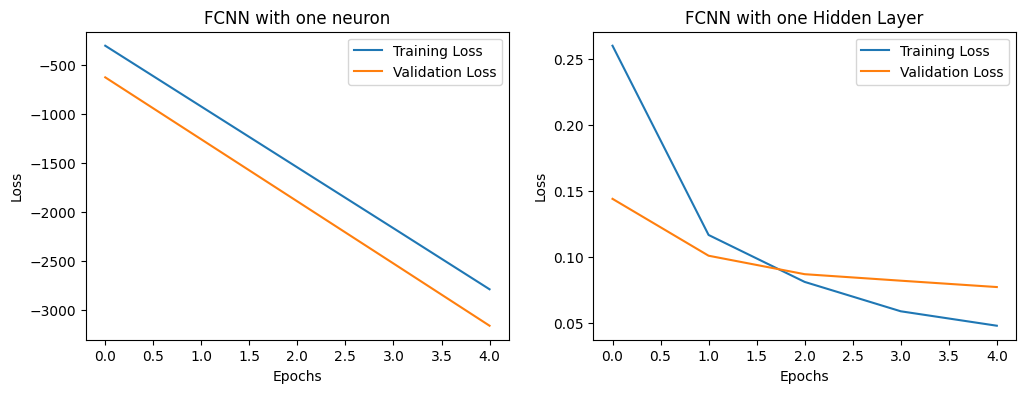

In [32]:
#7 FNN for MNIST
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential
from keras.src.datasets import mnist
from keras.src.layers import Flatten, Dense
from keras.src.optimizers import Adam

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a FCNN with one neuron
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1, activation='sigmoid')  # Change softmax to sigmoid
])

# Define a FCNN with one hidden layer
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Use 10 units for 10 classes
])

# Compile the models
model1.compile(optimizer=Adam(),
              loss='binary_crossentropy',  # Change the loss function for binary classification
              metrics=['accuracy'])

model2.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the models
history1 = model1.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
history2 = model2.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('FCNN with one neuron')
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('FCNN with one Hidden Layer')
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()